<h1>Аналитика в авиакомпании<span class="tocSkip"></span></h1>

1. Парсер для сбора данных с сайта  

2. Подготовка данных о количестве рейсов во время фестивалей  

3. Аналитика средствами Python  

4. Общий вывод

**Задача**  
  
Необходимо выявить предпочтения клиентов авиакомпании, покупающих билеты на разные направления, изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали.   

In [1]:
import pandas as pd 
import numpy as np

import requests 
from bs4 import (BeautifulSoup)  

from sqlalchemy import create_engine

import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:,.2f}'.format)

## Парсер для сбора данных с сайта

В первую очередь нам необходимо написать парсер для сбора данных с сайта об 11 крупнейших фестивалях 2018 года.

Ссылка на сайт: 

In [2]:
URL = 
req = requests.get(URL)
soup = BeautifulSoup(req.text, 'lxml')

table = soup.find('table',attrs={'id': 'best_festivals'})

heading_table = []

for row in table.find_all('th'): 
    heading_table.append(row.text)
content=[] 

for row in table.find_all('tr'): 
    if not row.find_all('th'): 
            content.append([element.text for element in row.find_all('td')])
            
festivals = pd.DataFrame(content, columns=heading_table) 
festivals.head(11)

,Название фестиваля,Место проведения,Дата проведения
0,Музыкальный фестиваль «Усадьба Jazz»,Екатеринбург,01.07.2018
1,Фестиваль музыки и технологий Alfa Future People,Нижний Новгород,10.08.2018
2,"Фестиваль еды «О, да! Еда!»",Санкт-Петербург,21.07.2018
3,Доброфест,Ярославль,29.07.2018
4,Park Live,Москва,28.07.2018
5,Пикник Афиши,Москва,04.08.2018
6,VK FEST,Санкт-Петербург,29.07.2018
7,"Фестиваль «О, да! Еда!»",Иркутск,25.08.2018
8,"Фестиваль «О, да! Еда!»",Владивосток,02.09.2018
9,Видфест,Москва,08.09.2018


Мы видим, что фестивали проходили в июле, августе и сентябре (конец лета, начало осени).   

Города проведения: 

- Москва     
- Санкт-Петербург   
- Екатеринбург   
- Нижний Новгород   
- Тверь    
- Ярославль   
- Иркутск  
- Владивосток   

Тематика: музыка, еда, видеоблогинг.

## Подготовка данных о количестве рейсов во время фестивалей

- Посмотрим на таблицу *airports* и выведите список городов (city), в которых есть аэропорты.

In [3]:
SELECT 
    DISTINCT(city)
FROM
    airports;

city: Липецк, Оренбург, Южно-Сахалинск, Красноярск, Калуга, Уфа, Новый Уренгой, Нарьян-Мар, Белгород, Нерюнгри, Ульяновск, Салехард, Грозный, Орск, Нижневартовск, Астрахань, Минеральные Воды, Когалым, Краснодар, Кемерово, Саранск, Братск, Якутск, Казань, Новокузнецк, Нижний Новгород, Екатеринбург, Белоярский, Пенза, Омск, Пермь, Сургут, Чебоксары, Надым, Тюмень, Сыктывкар, Нальчик, Волгоград, Иркутск, Томск, Норильск, Советский, Анапа, Ростов-на-Дону, Курск, Владикавказ, Удачный, Ставрополь, Йошкар-Ола, Петропавловск-Камчатский, Кызыл, Новосибирск, Воронеж, Улан-Удэ, Киров, Мирный, Ярославль, Стрежевой, Саратов, Горно-Алтайск, Геленджик, Петрозаводск, Иваново, Усть-Кут, Магадан, Абакан, Хабаровск, Самара, Калининград, Воркута, Махачкала, Тамбов, Чита, Анадырь, Усинск, Брянск, Мурманск, Череповец, Урай, Комсомольск-на-Амуре, Челябинск, Бугульма, Сочи, Москва, Усть-Илимск, Благовещенск, Санкт-Петербург, Ухта, Элиста, Барнаул, Нефтеюганск, Ханты-Мансийск, Псков, Магнитогорск, Нижнекамск, Нягань, Курган, Ноябрьск, Архангельск, Ижевск, Владивосток.  

Итого: 101 город. 

- Посмотрим на таблицу *flights* и подсчитаем количество вылетов (flight_id) из каждого аэропорта вылета (departure_airport). Назовем переменную cnt_flights и выведем её вместе со столбцом departure_airport — сначала departure_airport, потом cnt_flights. Результат отсортируем в порядке убывания количества вылетов.

In [4]:
SELECT 
    departure_airport,
    COUNT(flight_id) AS cnt_flights 
FROM
    flights 
GROUP BY
    departure_airport
ORDER BY
    cnt_flights DESC;

DME: 6376, SVO: 5912, LED: 3769, VKO: 3405, OVB: 2091, KJA: 1401, SVX: 1367, PEE: 1228, ROV: 1227, BZK: 1210, AER: 1159, OVS: 1089, SGC: 1055, HMA: 1021, NUX: 1003, KZN: 934, TJM: 847, CEK: 812, KHV: 795, ULV: 778, UFA: 761, MJZ: 761, IKT: 727, KVX: 726, EGO: 726, NOZ: 725, GOJ: 709, PES: 709, ARH: 640, VOG: 622, CSY: 605, REN: 605, ESL: 588, VKT: 554, JOK: 519, UUS: 519, TOF: 501, SCW: 501, MQF: 484, TBW: 484, RTW: 484, PEZ: 484, KRR: 468, ABA: 467, NBC: 450, KRO: 416, MRV: 415, MCX: 398, OMS: 397, NJC: 381, KGP: 380, ULY: 380, NOJ: 364, UUA: 363, UCT: 363, VVO: 363, KUF: 363, NAL: 363, UIK: 346, YKS: 329, KGD: 311, CNN: 311, NNM: 311, BAX: 311, ASF: 294, NYM: 278, URS: 277, NSK: 276, AAQ: 259, CEE: 259, SKX: 242, MMK: 242, VOZ: 242, URJ: 242, SLY: 242, OGZ: 242, KLF: 242, STW: 241, GDZ: 226, HTA: 191, PKV: 190, KEJ: 173, RGK: 172, IAR: 156, UUD: 139, OSW: 139, GRV: 138, BQS: 121, UKX: 121, IJK: 121, BTK: 121, SWT: 121, EYK: 104, NFG: 87, KYZ: 86, LPK: 86, DYR: 70, GDX: 70, IWA: 68, PKC: 52, NYA: 51, PYJ: 51, KXK: 35, USK: 34

- Найдем количество рейсов на каждой модели самолёта с вылетом в сентябре 2018 года.  
Назовем получившийся столбец flights_amount и выведем его, также выведем столбец model.  

In [5]:
SELECT
    aircrafts.model,
    COUNT(flights.flight_id) AS flights_amount
FROM
    aircrafts
    INNER JOIN flights ON flights.aircraft_code = aircrafts.aircraft_code 
WHERE
    CAST(flights.departure_time AS date) BETWEEN '2018-09-01' AND '2018-09-30'
GROUP BY 
    model;

Airbus A319-100: 607   
Airbus A321-200: 960   
Boeing 737-300: 630   
Boeing 767-300: 600    
Boeing 777-300: 300   
Bombardier CRJ-200: 4446   
Cessna 208 Caravan: 4557   
Sukhoi SuperJet-100: 4185    

- Посчитаем количество рейсов по всем моделям самолётов Boeing, Airbus и другим ('other') в сентябре.  
Типы моделей поместим в столбец type_aircraft, а количество рейсов — во flights_amount.

In [6]:
SELECT
    CASE WHEN model LIKE '%Boeing%' THEN 'Boeing'
         WHEN model LIKE '%Airbus%' THEN 'Airbus'
    ELSE 
         'other'
    END AS type_aircraft,
    COUNT(flights.flight_id) AS flights_amount
FROM
    aircrafts
    INNER JOIN flights ON flights.aircraft_code = aircrafts.aircraft_code 
WHERE
    CAST(flights.departure_time AS date) BETWEEN '2018-09-01' AND '2018-09-30'
GROUP BY 
    type_aircraft;

Airbus	1567  
Boeing	1530  
other	13188  

- Посчитаем среднее количество прибывающих рейсов в день для каждого города за август 2018 года.  
Получившееся поле назовем average_flights, вместе с ним выведем столбец city.

In [7]:
WITH table1 as(
    SELECT
        airports.city AS city,
        flights.arrival_time::DATE AS DATE,
        COUNT(flights.flight_id) AS flights_amount
    FROM
        flights
        INNER JOIN airports ON flights.arrival_airport = airports.airport_code
    WHERE
        EXTRACT('month' FROM flights.arrival_time) = '8'     
    GROUP BY
        airports.city,
        arrival_time::DATE)
 
SELECT
    city,
    AVG(flights_amount) AS average_flights
FROM
    table1
GROUP BY
    city

Оренбург - 5, Липецк - 1.29412, Красноярск - 11.5806, Уфа - 6.29032, Калуга - 2.03226, Ульяновск - 9.58065, Салехард - 2, Нижневартовск - 3.12903, Астрахань - 2.45161, Минеральные Воды - 3.41935, Краснодар - 3.90323, Когалым - 3.16129, Братск - 1, Казань - 7.74194, Нижний Новгород - 5.87097, Белоярский - 2, Пенза - 4, Пермь - 10.129, Сургут - 8.74194, Надым - 2.29032, Тюмень - 6.96774, Сыктывкар - 4.12903, Нальчик - 3, Иркутск - 6.03226, Волгоград - 5.12903
Ростов-на-Дону - 10.1935, Курск - 2.29032, Владикавказ - 2, Йошкар-Ола - 4.29032, Петропавловск-Камчатский - 1,Воронеж - 2, Мирный - 6.29032, Стрежевой - 1, Иваново - 1, Усть-Кут - 1, Магадан - 1.35714, Хабаровск - 6.54839, Абакан - 3.87097, Самара - 3, Тамбов - 4, Махачкала - 3.29032, Мурманск - 2, Брянск - 10, Череповец - 2.16129, Урай - 2, Челябинск - 6.70968, Бугульма - 3, Усть-Илимск - 2.87097, Москва - 129.774, Благовещенск - 1, Элиста - 4.87097,
Ханты-Мансийск - 8.41935, Нягань - 1, Курган - 3.41935, Ноябрьск - 3, Ижевск - 1, Южно-Сахалинск - 4.29032, Новый Уренгой - 8.29032, Нарьян-Мар - 2.6129, Белгород - 6, Нерюнгри - 2.58065, Грозный - 1.12903, Орск - 1.59091, Саранск - 2, Кемерово - 2, Якутск - 2.74194, Новокузнецк - 6.03226, Екатеринбург - 11.3226, Омск - 3.29032, Чебоксары - 5, Томск - 4.19355, Советский - 9, Норильск - 2.29032, Анапа - 2.16129, Удачный - 3, Ставрополь - 2, Новосибирск - 17.3226,, Кызыл - 1.27778, Улан-Удэ - 1.6087, Киров - 6, Ярославль - 1.32258, Саратов - 4, Горно-Алтайск - 1.3871, Геленджик - 2.59091, Петрозаводск - 5.87097, Калининград - 2.58065, Воркута - 4.58065, Чита - 1.58065, Анадырь - 1, Усинск - 1,Комсомольск-на-Амуре - 1, Сочи - 9.6129, Санкт-Петербург - 31.1613, Ухта - 3, Нефтеюганск - 1, Барнаул - 2.6129, Псков - 1.54839, Магнитогорск - 4, Нижнекамск - 3.74194, Архангельск - 5.35484, Владивосток - 3

- Найдем фестивали, которые проходили с 23 июля по 30 сентября 2018 года в Москве, и номер недели, в которую они проходили. Выведем название фестиваля festival_name и номер недели festival_week.

In [8]:
SELECT
    festival_name AS name,
    EXTRACT(WEEK FROM festival_date) AS festival_week
FROM
    festivals 
WHERE
    festival_city = 'Москва';

Park Live	30  
Пикник Афиши	31  
Видфест	36  

- Для каждой недели с 23 июля по 30 сентября 2018 года посчитаем количество билетов, купленных на рейсы в Москву (номер недели week_number и количество билетов ticket_amount). Получим таблицу, в которой будет номер недели; информация о количестве купленных за неделю билетов; номер недели ещё раз, если в эту неделю проходил фестиваль, и nan, если не проходил; а также название фестиваля festival_name.

In [9]:
WITH table1 AS (
    SELECT
        EXTRACT(WEEK FROM flights.arrival_time) AS week_number,
        COUNT(ticket_flights.ticket_no) AS ticket_amount
    FROM
        flights 
        INNER JOIN ticket_flights ON ticket_flights.flight_id = flights.flight_id
        INNER JOIN airports ON airports.airport_code = flights.arrival_airport
    WHERE
        arrival_time::date BETWEEN '2018-07-23' AND '2018-09-30'
        AND city = 'Москва'
    GROUP BY
        week_number) 
    
    , table2 AS (
    SELECT
        EXTRACT(WEEK FROM festival_date) AS festival_week,
        festival_name AS festival_name
    FROM
        festivals 
    WHERE
        festival_date::date BETWEEN '2018-07-23' AND '2018-09-30'
        AND festival_city = 'Москва')    
       
SELECT
    table1.week_number,
    table1.ticket_amount,
    table2.festival_week, 
    table2.festival_name
FROM 
    table2 
    RIGHT JOIN table1 ON table1.week_number = table2.festival_week

33	51378	nan  	
31	51034	31	Пикник Афиши  
38	51518	nan	  
30	43568	30	Park Live  
32	51675	nan	  
34	51492	nan	  
35	51360	nan	  
37	51670	nan	  
36	51386	36	Видфест  
39	51623	nan  

Изучив количество проданных билетов мы можем сделать вывод, что проведение фестивалей практически влияет на спрос.  
Интересное исключение составляет 30 неделя и фестиваль Park Live, здесь вопреки ожиданиям продажи билетов заметно снизились.

## Аналитика средствами Python

`query_1` — результат первого запроса  

В нём содержится информация о:  
- model — модели самолета
- flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года

In [10]:
query_1.head(10)

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [11]:
query_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


`query_3` — результат третьего запроса  

В нём содержится информация о:
- city — городах
- average_flights — среднем количестве рейсов, прибывающих в город city за день в августе 2018 года

In [12]:
query_3.head()

,city,average_flights
0,Абакан,3.87
1,Анадырь,1.00
2,Анапа,2.16
3,Архангельск,5.35
4,Астрахань,2.45


In [13]:
query_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


Проверим датасеты на наличие пропущенных значений. 

In [14]:
datasets = [query_1, query_3]

for dataset in datasets:
    display(dataset.isnull().sum().to_frame())

,0
model,0
flights_amount,0


,0
city,0
average_flights,0


Проверим датасеты на наличие дубликатов.

In [15]:
for dataset in datasets:
    dataset.drop_duplicates().reset_index(drop=True)
    print(dataset.duplicated().sum())

0
0


С данными познакомились, типы соответствуют значениям, пропусков и дубликатов не обнаружено.  
Приступаем к анализу.

### Топ-10 городов по количеству рейсов

In [16]:
top10 = query_3.pivot_table(index = 'city', values = 'average_flights').nlargest(10, 'average_flights')
top10

,average_flights
city,
Москва,129.77
Санкт-Петербург,31.16
Новосибирск,17.32
Красноярск,11.58
Екатеринбург,11.32
Ростов-на-Дону,10.19
Пермь,10.13
Брянск,10.00
Сочи,9.61


### Визуализация данных

- **Модели самолетов и количество рейсов**

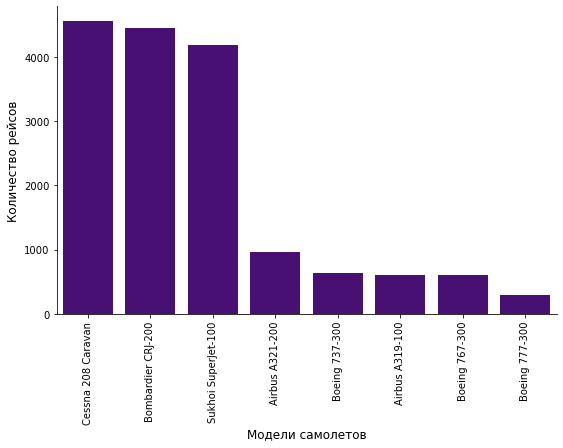

In [17]:
plot_order = query_1.groupby('model')['flights_amount'].sum().sort_values(ascending=False).index.values
sns.catplot(
    data=query_1, 
    x='model', 
    y='flights_amount', 
    kind='bar', 
    color='indigo', 
    ci=None, 
    legend_out=True, 
    order=plot_order,
    aspect=8/5)

plt.xlabel('Модели самолетов', fontsize=12)
plt.ylabel('Количество рейсов', fontsize=12)
plt.xticks(rotation=90) 
plt.show()

График показывает, что с большим отрывом по количеству полетов в сентябре 2018 года лидируют три модели: Bombardier CRJ-200, Cessna 208 Caravan, Sukhoi SuperJet-100. Bombardier - административный самолёт (бизнес-джет), он используется для частных перелетов чиновниками, звездами, бизнесменами и фактически это "личный автомобиль" в мире авиации. Cessna - это лёгкий одномоторный турбовинтовой самолёт общего назначения с неубирающимся шасси, этот самолет используется для обучения пилотов, развлекательных полетов и перелетов между небольшими населенными пунктами на небольшие расстояния. Sukhoi SuperJet-100 - это российский самолёт, который активно продвигают на внутреннем рынке. Остальные модели чаще используются для международных перелетов. 

**Города и количество рейсов**

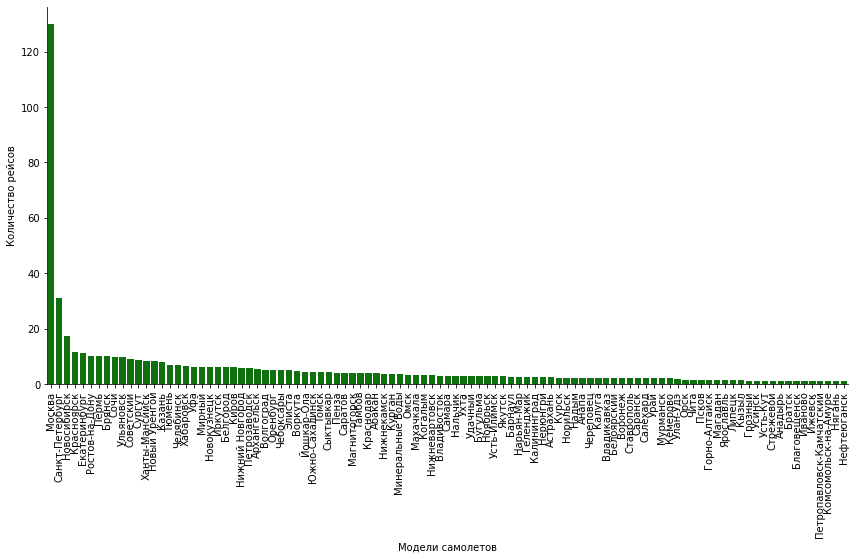

In [18]:
plot_order = query_3.groupby('city')['average_flights'].sum().sort_values(ascending=False).index.values
sns.catplot(
    data=query_3, 
    x='city', 
    y='average_flights', 
    kind='bar', 
    height=6, 
    aspect=2.1, 
    color='green', 
    ci=None, 
    legend_out=False, 
    order=plot_order)

plt.xlabel('Модели самолетов')
plt.ylabel('Количество рейсов')
plt.xticks(rotation=90) 
plt.show()

In [19]:
query_3['city'].value_counts().sum()

101

При выводе полного списка городов график получается не совсем наглядным, тем не менее, мы видим явных лидеров. 

**Топ-10 городов и количество рейсов**

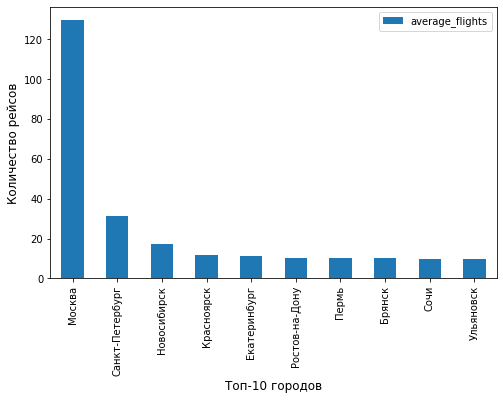

In [20]:
pivot = query_3.pivot_table(
    index='city', 
    values='average_flights', 
    aggfunc='sum').nlargest(10, 'average_flights')

pivot.plot.bar(rot=0, figsize=(8,5))
plt.xlabel('Топ-10 городов', fontsize=12)
plt.ylabel('Количество рейсов', fontsize=12)
plt.xticks(rotation=90)
plt.show()

Явным лидером по количеству рейсов прибывающих в город за день в августе 2018 года вполне ожидаемо становится столица, город с наибольшим количеством жителей и сосредоточением бизнес-процессов. Также это крупнейший в России транспортный узел, здесь оcуществляется большое количество пересадок международных и междугородних рейсов. Далее по нисходящей идут другие крупные транспортные узлы, практически без отрыва. 

## Общий вывод

Подведем итог, проведение фестивалей практически не влияет на продажи билетов. Для перелетов внутри страны авиакомпании в основном используют Bombardier CRJ-200, Cessna 208 Caravan, Sukhoi SuperJet-100. Для каждой модели своя задача: Bombardier - для привилегированных персон, Cessna - для небольших групповых перелетов, Sukhoi SuperJet - для крупных коммерческих рейсов. При этом наибольшее количество рейсов совершается в крупные города, так называемые транспортные узлы, где осуществляются пересадки пассажиров и передача грузов, топ-3: Москва, Санкт-Петербург, Новосибирск. 